In [1]:
#Data frames
import pandas as pd
#Operações matemáticas
import numpy as np
#Implementações de Machine Learning
import sklearn as sk
#Plotting para visualizar resultados
import matplotlib.pyplot as plt
#Divisão do Dataframe em pastas
from sklearn.model_selection import KFold 
#Mostrar gráficos do matplotlib no notebook
%matplotlib inline

# Exercício 1
## Holdout cross validation

In [2]:
#Importa dados
raw_data = pd.read_csv('class01.csv')
#Separa dataframe em Target e Dados
target = raw_data['target']
data = raw_data.loc[:,'x0':'x99']

In [3]:
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,1.162990,-0.831971,-0.185266,0.441240,0.033957,1.432988,-1.171483,0.203248,1.900889,1.119174,...,-1.130117,-1.139286,-0.608239,-0.107224,1.700972,-0.698151,0.520004,-0.450784,-0.187694,-0.538329
1,-1.750976,-0.516614,-0.761588,1.692347,-1.579436,0.581782,-0.950953,0.381426,-1.370027,0.943387,...,1.119688,-0.280502,-0.306014,0.554926,-1.402866,-0.776478,1.181890,-0.066449,-0.802430,1.587229
2,0.304635,0.972369,0.202908,-0.607761,0.487088,0.205173,0.815216,0.491880,0.904705,1.167017,...,0.580494,-0.134901,0.291496,-1.038477,1.297057,-1.296614,-1.109806,-0.003495,-0.149940,0.539892
3,-1.667576,-0.262639,-1.513473,-1.060125,-0.456209,1.782235,1.034366,0.115217,-0.182177,-1.007720,...,2.236321,1.203067,0.082647,-1.625862,-0.154116,0.478483,-1.465050,-0.450510,-0.757631,-3.184493
4,-0.820670,0.390631,0.761628,-0.945407,-0.871003,-0.142293,-1.522004,0.141962,0.091094,-0.860818,...,-1.891811,1.955541,0.079445,0.528177,1.522003,1.849394,-1.194590,1.023761,-0.335391,2.448868
5,0.464196,1.005845,-1.352187,-1.179769,0.609203,-0.136108,0.642619,-0.717700,0.095535,1.073263,...,0.545786,-0.110694,0.720276,-2.059236,-0.643318,-3.483737,1.218793,-0.783723,-0.499011,0.305048
6,-0.579694,-0.618598,-0.661865,-1.124007,-1.574926,0.831409,0.554470,-1.008051,-1.259200,-0.323183,...,0.063511,0.820306,-0.777701,-0.720523,0.930181,0.417045,-1.717030,1.491438,-1.584237,-0.130900
7,0.169446,0.782043,-1.876937,-0.574452,-0.959616,0.048718,-1.908269,-0.916971,0.605071,0.295416,...,-0.174566,0.229592,-0.752680,1.775984,1.648896,3.344035,-1.963089,-0.759330,-1.892505,4.388772
8,1.508218,-1.097923,1.698181,0.062074,-2.127947,-0.148446,-2.641919,-0.330138,-0.769511,0.681149,...,1.391228,-2.466775,-0.379144,1.358977,2.009735,-3.137339,0.405606,1.091420,-1.134505,-1.915486
9,0.950922,0.603789,0.482229,-0.039361,0.072268,-0.618908,-0.830591,-0.845691,-0.327788,0.210725,...,0.097289,-0.020980,-0.412515,-0.079690,-2.420217,0.444355,0.073330,0.868657,-0.311337,-0.083539


Notamos então que há $1000$ dados com $100$ features cada.

In [4]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(data.iloc[0:350,], target.iloc[0:350])

train_accuracy = sk.metrics.accuracy_score(target.iloc[0:350], nb.predict(data.iloc[0:350]))
test_accuracy = sk.metrics.accuracy_score(target.iloc[350:1000], nb.predict(data.iloc[350:1000]))


In [5]:
print(train_accuracy)
print(test_accuracy)

0.76
0.6276923076923077


Logo, a acurácia média de treinamento foi $0.76$, e a acurácia média de teste foi $0.63$.

## Leave one out

In [6]:
#Cria função para iterar o dataframe em pastas
folds1000 = KFold(n_splits=1000)
folds1000.get_n_splits(raw_data)
train_accuracy = []
test_accuracy = []
for train_index, test_index in folds1000.split(raw_data):
    nb = GaussianNB()
    nb.fit(data.iloc[train_index], target.iloc[train_index])
    
    train_accuracy.append(sk.metrics.accuracy_score(target.iloc[train_index], nb.predict(data.iloc[train_index])))
    test_accuracy.append(sk.metrics.accuracy_score(target.iloc[test_index], nb.predict(data.iloc[test_index])))

In [7]:
print("Average test accuracy: ", np.mean(test_accuracy))
print("Average train accuracy: ", np.mean(train_accuracy))

Average test accuracy:  0.642
Average train accuracy:  0.6892802802802803


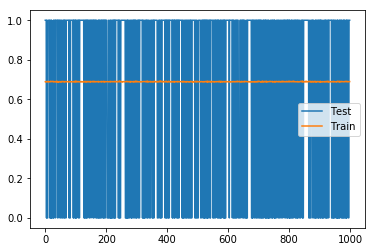

In [8]:
#Plota acurácia de treinamento e teste para cada modelo
plt.plot(range(len(test_accuracy)), test_accuracy, label = "Test")
plt.plot(range(len(test_accuracy)), train_accuracy,label = "Train")
#plt.ylim([0.5,1])
plt.legend()
plt.show()
#isso foi uma má ideia

Logo, a acurácia média de treinamento foi $0.69$, e a acurácia média de teste foi $0.64$.

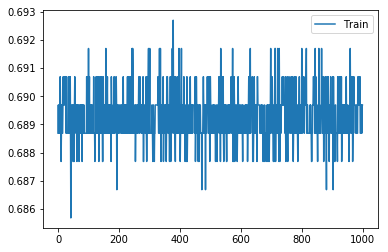

In [9]:
#Plota acurácia de treinamento para cada modelo
plt.plot(range(len(test_accuracy)), train_accuracy,label = "Train")
plt.legend()
plt.show()

# Exercício 2

In [10]:
#Importa dados
raw_data = pd.read_csv('class02.csv')
#Separa dataframe em Target e Dados
target = raw_data['target']
data = raw_data.loc[:,'x0':'x99']

In [11]:
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,1.753916,-1.283809,-0.474435,-0.328502,1.162749,1.110096,-0.532774,1.041946,0.393644,1.508894,...,-2.287802,-0.102623,0.233644,-1.711628,0.816312,2.700492,2.813359,0.343391,0.348734,-0.269752
1,0.579139,0.499696,1.848421,-2.037663,-0.490755,-0.874975,0.988246,0.117195,0.641343,1.041325,...,-1.049899,-0.113718,0.918633,1.212413,2.534996,-1.694515,-2.519081,0.531062,-0.429925,-1.033625
2,3.455631,-0.843593,-1.180263,-1.388971,-0.763881,-0.809791,-0.225052,0.818787,1.021153,-0.486736,...,-1.526304,-0.812184,-0.677958,2.545184,2.228583,-1.911287,-3.965635,1.293003,0.196379,-0.739823
3,2.917033,-1.369227,1.312688,-0.445185,0.218093,1.990030,-1.176665,-0.116772,1.242437,0.100773,...,-0.910900,-1.691702,-1.903862,-0.437867,-0.542272,1.104584,-1.132434,0.580519,0.953035,1.643271
4,1.565296,-0.072016,1.263672,0.926946,-1.769547,0.745731,0.977034,3.002904,1.847178,-1.132675,...,-4.443512,0.158105,3.591999,1.866443,1.930861,1.731162,-1.206966,-0.956707,-0.343488,1.194939
5,1.664840,0.780263,-0.492934,-0.687751,-0.273977,-0.201736,-0.517957,-0.439052,0.441450,0.173440,...,-0.573868,1.204554,-0.513993,-0.471974,-0.680114,0.809775,-1.530020,0.849555,-0.639681,0.295648
6,0.260179,0.111172,0.859410,-1.430560,0.721526,0.365374,1.267784,2.853179,-2.624575,-0.824025,...,-2.556644,-0.498161,-0.648930,3.196699,3.977463,-0.870749,0.623555,1.126165,-0.210268,0.585678
7,1.531081,0.427552,-0.074162,-0.777093,-0.750487,0.424605,0.908783,0.984507,-1.221785,-0.638601,...,-1.469966,-0.511950,0.954795,0.240438,-0.145827,0.998780,-0.436178,0.546389,0.824163,0.721331
8,-0.268337,0.900653,-1.059066,-0.872369,0.092654,0.244358,-0.243925,2.367603,0.131172,-2.336892,...,0.757872,1.034410,0.159261,3.008117,1.822137,-2.199951,3.196142,-2.295238,-0.335957,-2.048305
9,-0.445071,-1.152312,-0.176441,-0.435753,0.100010,1.373588,-1.362360,0.841291,1.193482,0.287117,...,-2.432587,-0.606069,0.142003,-0.505256,0.138692,2.087375,-0.547705,0.316680,-0.110217,-0.363320


Notamos então que há $1500$ dados com $100$ features cada. 

In [12]:
#importa classificador
from sklearn.neighbors import KNeighborsClassifier

#Cria função para iterar o dataframe em pastas
folds10 = KFold(n_splits=10)
folds10.get_n_splits(raw_data)

#Lista para armazenar acurácia
train_accuracy = []
test_accuracy = []

#Cria 10 modelos e realiza fitting e treinamento. 
for train_index, test_index in folds10.split(raw_data):
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(data.iloc[train_index], target.iloc[train_index])
    
    test_accuracy.append(sk.metrics.accuracy_score(target.iloc[test_index], knn.predict(data.iloc[test_index])))
    train_accuracy.append(sk.metrics.accuracy_score(target.iloc[train_index], knn.predict(data.iloc[train_index])))

print("Average test accuracy: ", np.mean(test_accuracy))
print("Average train accuracy: ", np.mean(train_accuracy))

Average test accuracy:  0.834
Average train accuracy:  0.871037037037037


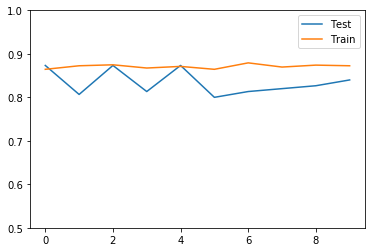

In [13]:
#Plota acurácia de treinamento e teste para cada modelo
plt.plot(range(10), test_accuracy, label = "Test")
plt.plot(range(10), train_accuracy, label = "Train")
plt.ylim([0.5,1])
plt.legend()
plt.show()

Logo, acurácia média de treinamento foi de $0.834$, enquanto que a acurácia média de teste foi de $0.871$.

# Exercício 3 

In [14]:
#Importa dados
raw_data = pd.read_csv('reg01.csv')
#Separa dataframe em Target e Dados
target = raw_data['target']
data = raw_data.loc[:,'x0':'x9']

In [15]:
raw_data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,target
0,-0.640731,0.677929,-0.285153,0.469127,1.629361,-0.407575,0.677929,0.781634,-0.132065,-0.125852,238.342700
1,-1.257229,0.199883,0.369755,0.905828,2.199284,0.407064,0.199883,-0.276165,0.136314,-0.835977,30.823609
2,-1.351330,-0.159821,-0.667650,-0.067187,1.309160,-0.702359,-0.159821,-0.133427,-0.683428,-1.016574,-135.707090
3,-2.432787,-0.996849,-0.704290,-0.750186,1.066865,-0.082292,-0.996849,-1.860141,-1.151661,-1.850721,-579.983211
4,-1.475213,-0.318454,-0.682221,-0.151922,1.148624,-0.583869,-0.318454,-0.621999,-0.619677,-1.134553,-250.729762
5,-2.036118,-1.078599,-0.499542,-0.172896,1.229001,-0.398228,-1.078599,-1.428676,-0.831903,-1.701761,-505.959443
6,-1.691544,-0.526730,-1.080969,-0.458262,0.553429,-1.145279,-0.526730,-0.684251,-1.480774,-0.981174,-331.728587
7,-0.441204,0.624858,0.518443,0.884419,2.270696,0.458040,0.624858,-0.164600,0.381948,-0.118522,171.255615
8,-2.648067,-1.897761,-1.109478,-1.327286,0.566497,-0.719584,-1.897761,-2.537705,-1.663454,-2.328546,-906.764602
9,-0.355480,0.576553,0.630524,1.034954,2.511433,0.900122,0.576553,-0.372276,0.410074,-0.076135,153.852732


Logo, notamos que há $1000$ dados com $10$ features.

In [16]:
from sklearn.linear_model import Lasso

#Cria função para iterar o dataframe em pastas
folds1000 = KFold(n_splits=1000)
folds1000.get_n_splits(raw_data)
train_accuracy = []
test_accuracy = []

for train_index, test_index in folds1000.split(raw_data):
    lasso = Lasso()
    lasso.fit(data.iloc[train_index], target.iloc[train_index])
    
    train_accuracy.append(np.sqrt(sk.metrics.mean_squared_error(target.iloc[train_index], lasso.predict(data.iloc[train_index]))))
    test_accuracy.append(np.sqrt(sk.metrics.mean_squared_error(target.iloc[test_index], lasso.predict(data.iloc[test_index]))))
    
print("Average test accuracy: ", np.mean(test_accuracy))
print("Average train accuracy: ", np.mean(train_accuracy))

Average test accuracy:  15.465218791702439
Average train accuracy:  19.22025983771034


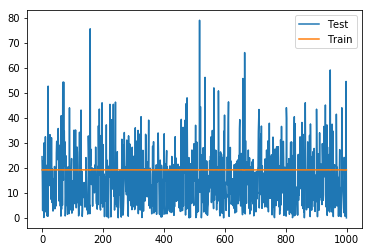

In [17]:
#Plota acurácia de treinamento e teste para cada modelo
plt.plot(range(len(test_accuracy)), test_accuracy, label = "Test")
plt.plot(range(len(test_accuracy)), train_accuracy,label = "Train")
#plt.ylim([0.5,1])
plt.legend()
plt.show()

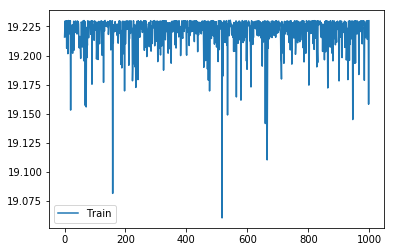

In [18]:
#Plota acurácia de treinamento para cada modelo
plt.plot(range(len(test_accuracy)), train_accuracy,label = "Train")
plt.legend()
plt.show()

Logo, RMSE para treinamento foi $19.22$, e RMSE para teste foi $15.46$.

# Exercício 4

In [19]:
#Importa dados
raw_data = pd.read_csv('reg02.csv')
#Separa dataframe em Target e Dados
target = raw_data['target']
data = raw_data.loc[:,'x0':'x19']

In [20]:
raw_data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,target
0,-0.640731,0.677929,-0.285153,0.469127,1.629361,-0.407575,0.677929,0.781634,-0.132065,-0.125852,...,0.469127,0.976612,-0.237673,0.270627,-0.146189,0.976612,2.370730,0.783461,0.783461,238.342700
1,-1.257229,0.199883,0.369755,0.905828,2.199284,0.407064,0.199883,-0.276165,0.136314,-0.835977,...,0.905828,1.523959,-0.376705,0.811498,0.053166,1.523959,1.807168,-0.095143,-0.095143,30.823609
2,-1.351330,-0.159821,-0.667650,-0.067187,1.309160,-0.702359,-0.159821,-0.133427,-0.683428,-1.016574,...,-0.067187,0.592357,-0.700500,-0.221701,-0.683485,0.592357,1.456616,-0.464433,-0.464433,-135.707090
3,-2.432787,-0.996849,-0.704290,-0.750186,1.066865,-0.082292,-0.996849,-1.860141,-1.151661,-1.850721,...,-0.750186,0.159958,-1.482334,0.538354,-1.391746,0.159958,0.603398,-1.372567,-1.372567,-579.983211
4,-1.475213,-0.318454,-0.682221,-0.151922,1.148624,-0.583869,-0.318454,-0.621999,-0.619677,-1.134553,...,-0.151922,0.578886,-0.932404,-0.025521,-0.436129,0.578886,1.341985,-0.803744,-0.803744,-250.729762
5,-2.036118,-1.078599,-0.499542,-0.172896,1.229001,-0.398228,-1.078599,-1.428676,-0.831903,-1.701761,...,-0.172896,0.570486,-1.232999,0.202154,-0.913793,0.570486,0.678857,-1.577136,-1.577136,-505.959443
6,-1.691544,-0.526730,-1.080969,-0.458262,0.553429,-1.145279,-0.526730,-0.684251,-1.480774,-0.981174,...,-0.458262,-0.420565,-0.988245,-0.364550,-1.269259,-0.420565,1.068225,-0.815158,-0.815158,-331.728587
7,-0.441204,0.624858,0.518443,0.884419,2.270696,0.458040,0.624858,-0.164600,0.381948,-0.118522,...,0.884419,1.618755,0.600149,1.263604,0.192593,1.618755,2.220744,0.141265,0.141265,171.255615
8,-2.648067,-1.897761,-1.109478,-1.327286,0.566497,-0.719584,-1.897761,-2.537705,-1.663454,-2.328546,...,-1.327286,-0.280766,-1.958602,0.149022,-1.813940,-0.280766,0.031582,-2.194514,-2.194514,-906.764602
9,-0.355480,0.576553,0.630524,1.034954,2.511433,0.900122,0.576553,-0.372276,0.410074,-0.076135,...,1.034954,1.774794,0.303705,1.625444,0.405700,1.774794,2.304384,0.129050,0.129050,153.852732


Logo, notamos que há $1000$ dados com $20$ features.

In [21]:
from sklearn.tree import DecisionTreeRegressor

#Cria função para iterar o dataframe em pastas
folds10 = KFold(n_splits=10)
folds10.get_n_splits(raw_data)

#Lista para armazenar acurácia
train_accuracy = []
test_accuracy = []

#Cria 10 modelos e realiza fitting e treinamento. 
for train_index, test_index in folds10.split(raw_data):
    dtr = DecisionTreeRegressor()
    dtr.fit(data.iloc[train_index], target.iloc[train_index])
    
    test_accuracy.append(sk.metrics.mean_absolute_error(target.iloc[test_index], dtr.predict(data.iloc[test_index])))
    train_accuracy.append(sk.metrics.mean_absolute_error(target.iloc[train_index], dtr.predict(data.iloc[train_index])))

print("Average test accuracy: ", np.mean(test_accuracy))
print("Average train accuracy: ", np.mean(train_accuracy))

Average test accuracy:  43.16311203484641
Average train accuracy:  0.0


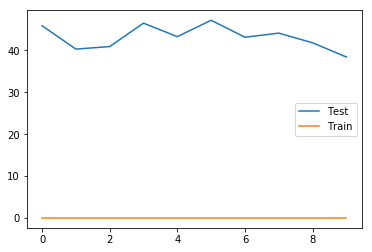

In [22]:
#Plota acurácia de treinamento e teste para cada modelo
plt.plot(range(len(test_accuracy)), test_accuracy, label = "Test")
plt.plot(range(len(test_accuracy)), train_accuracy,label = "Train")
#plt.ylim([0.5,1])
plt.legend()
plt.show()

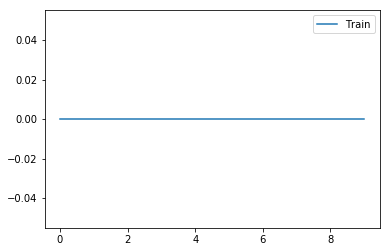

In [23]:
#Plota acurácia de treinamento para cada modelo
plt.plot(range(len(test_accuracy)), train_accuracy,label = "Train")
plt.legend()
plt.show()

Logo, RMSE de treinamento foi $0$, e o RMSE de teste foi $43.24$.